In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
original = pd.read_csv('housing.csv')

In [3]:
original

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
original.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


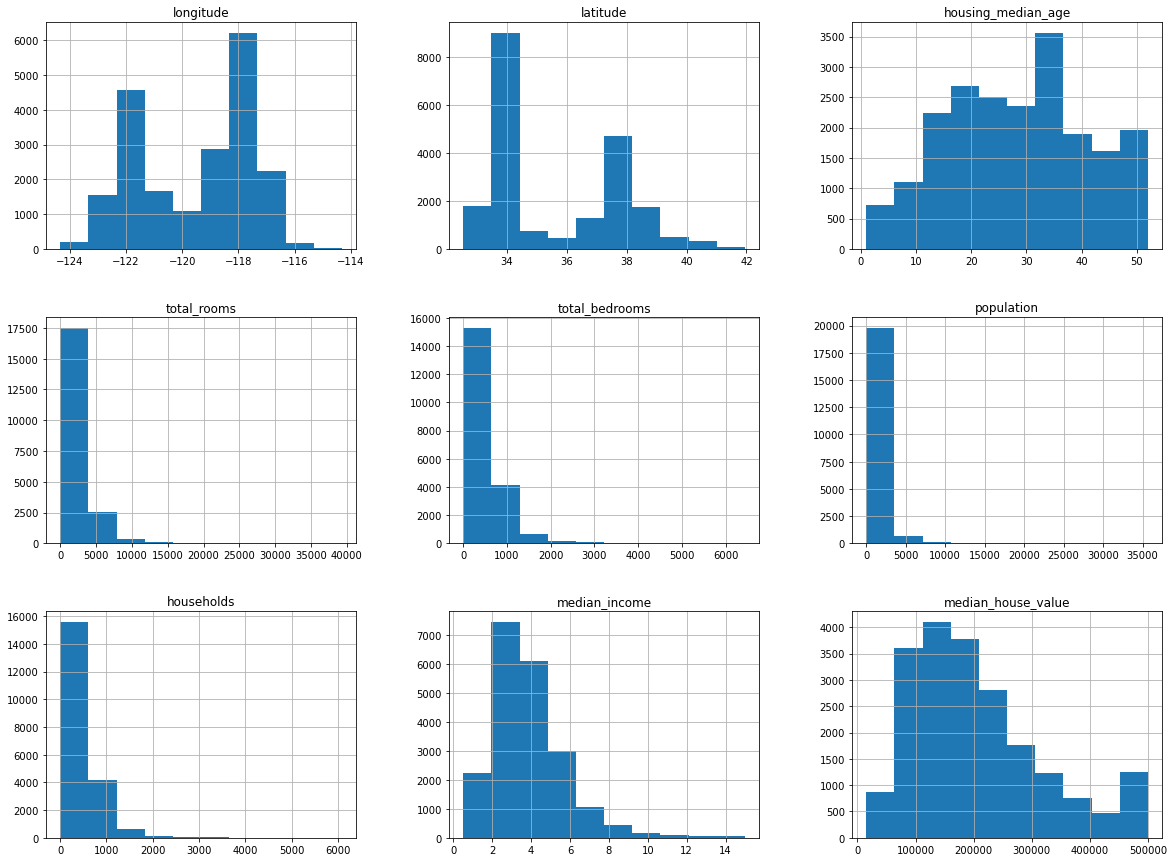

In [6]:
original.hist(figsize=(20,15))
plt.show()

In [7]:
## Let's see what correlates with housing prices the most
corr = np.abs(original.corr()['median_house_value']).sort_values(ascending=False)
corr
## median income has the highest correlation with the housing price 

median_house_value    1.000000
median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
Name: median_house_value, dtype: float64

In [8]:
## Represented in $10000
original['median_income']

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20640, dtype: float64

In [9]:
## Create 5 distinct categories for income column
original['income_cat'] = pd.cut(original["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])
## Let's look at the ratio of total instances to income catergories 
## indexes represent the category, values represend the ratio 
original_ratio = original['income_cat'].value_counts().sort_index()/len(original)
original_ratio 

1    0.039826
2    0.318847
3    0.350581
4    0.176308
5    0.114438
Name: income_cat, dtype: float64

In [10]:
## Split the dataset into train/test sets with simple sampling using  sklearn.model_selection.train_test_split
## Let's use 80/20 ratio for the split (0.2)
train_simple_set, test_simple_set = train_test_split(original, test_size=0.2, random_state=42)
print(''' Number of rows in training set: {} \n Number of rows in testing set: {}
         '''.format(len(train_simple_set), len(test_simple_set)))

 Number of rows in training set: 16512 
 Number of rows in testing set: 4128
         


In [11]:
random_sample_ratio = test_simple_set['income_cat'].value_counts().sort_index()/len(test_simple_set)
random_sample_ratio

1    0.040213
2    0.324370
3    0.358527
4    0.167393
5    0.109496
Name: income_cat, dtype: float64

In [12]:
## Split the dataset based on the strata we created (income_cat) with StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
## Provides indeces of train/test set
for train_index, test_index in split.split(original, original['income_cat']):
    train_strat_set = original.loc[train_index]
    test_strat_set = original.loc[test_index]
    print(''' Number of rows in training set: {} \n Number of rows in testing set: {}
          '''.format(len(train_strat_set), len(test_strat_set)))

 Number of rows in training set: 16512 
 Number of rows in testing set: 4128
          


In [13]:
## Let's create ratio of 'income_cat' column to see how the StratifiedShuffleSplit split the data 
strat_sample_ratio = test_strat_set['income_cat'].value_counts().sort_index()/len(test_strat_set)
strat_sample_ratio

1    0.039729
2    0.318798
3    0.350533
4    0.176357
5    0.114583
Name: income_cat, dtype: float64

In [14]:
## Let's combine each sampling proportions with the original sample
## This way we can 
sampling_bias = {'Original': original_ratio, 'Random_sample': random_sample_ratio, 'Stratified_sample': strat_sample_ratio}
comparison = pd.DataFrame(sampling_bias)
comparison['Simple %error'] = comparison['Random_sample']/comparison['Original']*100 - 100
comparison['Stratified %error'] = comparison['Stratified_sample']/comparison['Original']*100 - 100
comparison
## indices are categories of median income 

,Original,Random_sample,Stratified_sample,Simple %error,Stratified %error
1,0.039826,0.040213,0.039729,0.973236,-0.243309
2,0.318847,0.324370,0.318798,1.732260,-0.015195
3,0.350581,0.358527,0.350533,2.266446,-0.013820
4,0.176308,0.167393,0.176357,-5.056334,0.027480
5,0.114438,0.109496,0.114583,-4.318374,0.127011


### Sampling findings:
As you can see above, stratified sampling produced almost identical income proportions to those in the original  dataset, whereas dataset generated by random sampling is quite skewed. This means that random sampling is not representative of the whole population and therefore is biased. 

#### Conclusion:

We should use stratified method to split the dataset into train and test sets.

I will be working with the datasets below:

* train_strat_set

* test_strat_set

Note that I won't be using test_strat_set untill the end (when the best model is chosen)

In [15]:
## Let's remove the previously created category column 'income_cat' since we don't need it anymore
for set_split in (train_strat_set, test_strat_set):
    set_split.drop(columns='income_cat', inplace = True)

In [16]:
train_strat_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN


In [17]:
housing = train_strat_set.drop('median_house_value', axis=1)
housing_labels = train_strat_set['median_house_value'].copy()

In [18]:
housing_num = housing.drop('ocean_proximity', axis=1)
housing_cat = housing[['ocean_proximity']]

In [19]:
from sklearn.base import BaseEstimator, TransformerMixin

In [20]:
## Custom built normalizer usning std
## I mimicked the functionality of sklearn.preprocessing.StandardScaler 
class CustomNormalize(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.means_ = None
        self.std_ = None

    def fit(self, X, y=None):
        if not isinstance(X, np.ndarray):
            X = X.values
        
        self.means_ = X.mean(axis=0)
        self.std_ = X.std(axis=0)
        return self
    
    def transform(self, X, y=None):
        if not isinstance(X, np.ndarray):
            X = X.values
        return (X - self.means_)/self.std_ 
    
## Inherited fit_transform method from TransformerMixin for "free"

In [21]:
## Custom built imputer
## I mimicked the functionality of sklearn.impute.SimpleImputer
class CustomImpute(BaseEstimator, TransformerMixin):
    def __init__(self, method):
        self.median_ = None
        self.mean_ = None
        self.method = method
    
    def fit(self, X, y=None):
        if not isinstance(X, np.ndarray):
            X = X.values
        
        if self.method == 'median':
            self.median_ = np.nanmedian(X, axis=0)
            
        elif self.method == 'mean':
            self.mean_ = np.nanmean(X, axis=0)
        return self
    
    def transform(self, X, y=None):
        if not isinstance(X, np.ndarray):
            X = X.values
            
        if self.method == 'median':
            return np.nan_to_num(X, nan=self.median_)
        elif self.method == 'mean':
            return np.nan_to_num(X, nan=self.mean_)       

In [22]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): 
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    def fit(self, X, y=None):
        return self 
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix] 
        population_per_household = X[:, population_ix] / X[:, households_ix] 
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [23]:
## Pipeline class that wraps all each function in a sequential order
from sklearn.pipeline import Pipeline

## ColumnTransformer handles transformation to columns seperately (numeric columns and categorical columns)
from sklearn.compose import ColumnTransformer

In [24]:
## Converts to categorical values 
from sklearn.preprocessing import OneHotEncoder

In [25]:
## Numeric columns
num_pipeline = Pipeline([
         ('imputer', CustomImpute(method='median')),
         ('standardize', CustomNormalize()),
         ('atr_combo', CombinedAttributesAdder())])

In [26]:
num_columns = list(housing_num)
cat_columns = ['ocean_proximity']

In [27]:
## Numberic columns + categorical columns
full_pipeline = ColumnTransformer([
            ("num", num_pipeline, num_columns), 
            ("cat", OneHotEncoder(), cat_columns),])

In [28]:
housing_prepared = full_pipeline.fit_transform(housing)

## Experementing with different models:

Now that the dataset is in a good shape, I can experement with different models to find the optimal RMSE.

#### Linear Regression:

In [29]:
## Let's see how LinearRegression model performs 
ln = LinearRegression()
ln.fit(housing_prepared, housing_labels)
ln_predictions = ln.predict(housing_prepared)
ln_mse = mean_squared_error(housing_labels, ln_predictions)
ln_rmse = np.sqrt(ln_mse)
ln_rmse

69045.21103563349

In [30]:
## Cross validation with 10 folds using negative mean squared error as a score
ln_scores = cross_val_score(ln, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
ln_avg = np.mean(np.sqrt(np.abs(ln_scores)))
ln_avg

69221.51082474498

#### Decision Tree:

In [31]:
## Let's see how DecisionTreeRegressor algorithm performs
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)
tree_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse
## Badly overfits the data
## Performs "perfect" on fitting and predicting on training set 

0.0

In [32]:
## Let's use cross validation method on training set to test our model by splitting the set into train/test
## Note, I'm still using just the training set for cross validation with 10 folds
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_avg = np.mean(np.sqrt(np.abs(tree_scores)))
tree_avg
## This is more realistic 

71140.77645463475

#### Random Forest:

In [33]:
## Let's see how RandomForestRegressor performs
forest = RandomForestRegressor()
forest.fit(housing_prepared, housing_labels)
forest_predictions = forest.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, forest_predictions)
rmse_forest = np.sqrt(forest_mse)
rmse_forest
## Still model is overfitting the dataset

18462.213482108775

In [34]:
forest_scores = cross_val_score(forest, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=5)
forest_avg = np.mean(np.sqrt(np.abs(forest_scores)))
forest_avg
## Better and realistic score with cross validation

50110.347558277404

In [35]:
## Let's stick with RandomForestRegressor and tune the hyperparameters with GridSearchCV
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)
print("Model performs relatively good with {} hyperparameters".format(grid_search.best_params_))

Model performs relatively good with {'max_features': 8, 'n_estimators': 30} hyperparameters


In [36]:
## Store the these hyperparameters
best_model = grid_search.best_estimator_
best_model

RandomForestRegressor(max_features=8, n_estimators=30)

### Now that I found the best model, I can use it for the testing set that I haven't used yet

In [37]:
## Use the best_model to predict the varibles for testing set
X_test = test_strat_set.drop("median_house_value", axis=1)
y_test = test_strat_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
X_test_predictions = best_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, X_test_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47890.401251450356

### Conclusion:

As you can see hyperparameters with max_features=8, n_estimators=30 using Random Forest algorithm gave me relatively good prediction. I could however use GridSearch with even more hyperparameters to find better RMSE